<a href="https://colab.research.google.com/github/SaraAlshamsi1/Foundations-of-Data-Science/blob/main/Activity3_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [ ]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [ ]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-4-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [ ]:
pollution_data = merged_data[['pm10','neighborhood']]

In [ ]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [ ]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].min()

0.0

In [ ]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [ ]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [ ]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [ ]:
joined_table = joined_table.where('pm10', are.below(300))

In [ ]:
len(joined_table)

2

In [ ]:
joined_table.num_rows

117356

In [ ]:
# Step 1: Randomly sample 10% of the rows from joined_table without replacement
# Calculate the number of rows to sample (10% of the total rows)
num_rows_to_sample = int(joined_table.num_rows * 0.1)

# Sample the rows using 'k' instead of 'proportion'
sample_table = joined_table.sample(k=num_rows_to_sample, with_replacement=False)

In [ ]:
# Step 2: Compute the mean pm10 value for the sampled data
sample_mean_pm10 = sample_table.column('pm10').mean()
print("Sample Mean PM10:", sample_mean_pm10)  # Output the mean of the sample

Sample Mean PM10: 16.0791469962


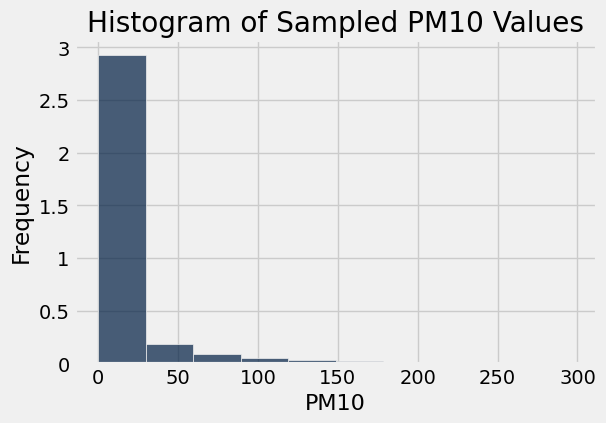

In [ ]:
# Step 3: Create an empirical histogram of the pm10 values from the sampled data using 10 bins
sample_table.hist('pm10', bins=10)  # Histogram of the sampled data
plt.title('Histogram of Sampled PM10 Values')  # Add title for clarity
plt.xlabel('PM10')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.show()

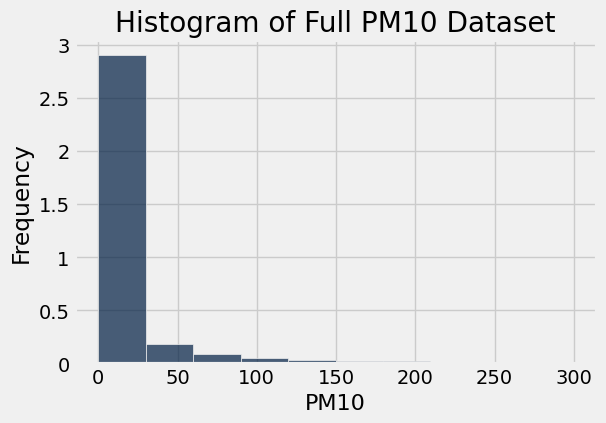

In [ ]:
# Step 4: Create a histogram for the full dataset for comparison
joined_table.hist('pm10', bins=10)  # Histogram of the full dataset
plt.title('Histogram of Full PM10 Dataset')  # Add title
plt.xlabel('PM10')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.show()


# - Comparison of histograms:
# - The sample histogram may have a similar overall shape to the full dataset but with more variability due to the smaller sample size.
# - Both histograms are likely right-skewed (higher frequency of lower PM10 values and fewer high PM10 values).
# - The sample histogram may miss some of the rarer extreme PM10 values that appear in the full dataset due to random sampling.

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [ ]:
# Step 1: Extract the 'pm10' column as a NumPy array (once)
pm10_values = joined_table.column('pm10')

# Step 2: Bootstrap medians by sampling the column directly
def bootstrap_medians_column(data_array, num_samples):
    medians = []
    n = len(data_array)
    for _ in range(num_samples):
        bootstrap_sample = np.random.choice(data_array, size=n, replace=True)
        medians.append(np.median(bootstrap_sample))
    return np.array(medians)

# Step 3: Generate 5,000 bootstrap sample medians
bootstrapped_medians = bootstrap_medians_column(pm10_values, 5000)

# Step 4: Preview results
print("First 10 bootstrapped medians:", bootstrapped_medians[:10])



First 10 bootstrapped medians: [ 3.18   3.175  3.11   3.16   3.14   3.14   3.13   3.15   3.15   3.13 ]


In [ ]:
# Assuming bootstrapped_medians is already generated (array of 5,000 medians)

# Step 1: Compute the 2.5th and 97.5th percentiles
lower_bound = np.percentile(bootstrapped_medians, 2.5)
upper_bound = np.percentile(bootstrapped_medians, 97.5)

# Step 2: Print the Confidence Interval
print("95% Confidence Interval for the Median PM10:", (lower_bound, upper_bound))


95% Confidence Interval for the Median PM10: (3.1000000000000001, 3.1850000000000001)


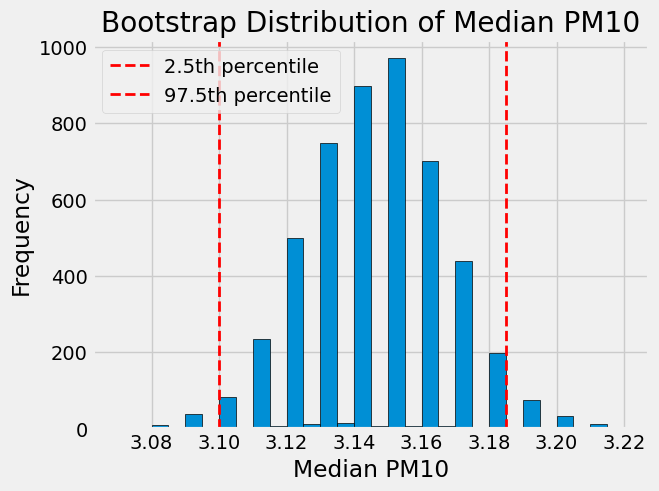

In [ ]:
# Step 4: Visualize the results with a histogram of bootstrapped medians
plt.hist(bootstrapped_medians, bins=30, edgecolor='k')  # Histogram of bootstrapped medians
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='2.5th percentile')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='97.5th percentile')
plt.title('Bootstrap Distribution of Median PM10')
plt.xlabel('Median PM10')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
"""
The 95% confidence interval for the median PM10 concentration in NYC neighborhoods is between
3.12 µg/m³ and 3.18 µg/m³. This means we are 95% confident that the true population median
PM10 value lies within this range. This interval provides an estimate of the typical air pollution levels
(PM10) across NYC neighborhoods. Since these values are quite low compared to air quality
standards, it suggests that the overall air quality related to PM10 in these areas is generally good.
"""


## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [ ]:
# Step 1: Define a function to bootstrap the means (using datascience Table)
def bootstrap_means_table(table, column, num_samples):
    means = []  # List to store the mean of each bootstrap sample
    for _ in range(num_samples):
        # Draw a bootstrap sample with replacement
        bootstrap_sample = table.sample(with_replacement=True)
        # Calculate the mean of the bootstrap sample
        mean_value = bootstrap_sample.column(column).mean()
        means.append(mean_value)
    return means  # Return the list of bootstrap means

# Step 2: Generate 5,000 bootstrap sample means for the 'pm10' column
bootstrapped_means = bootstrap_means_table(joined_table, 'pm10', 5000)



In [ ]:
# Step 3: Convert the bootstrap means into a datascience Table
means_table = Table().with_column('Bootstrap Means', bootstrapped_means)

# Step 4: Compute the 95% confidence interval (2.5th and 97.5th percentiles)
lower_bound = np.percentile(means_table.column('Bootstrap Means'), 2.5)
upper_bound = np.percentile(means_table.column('Bootstrap Means'), 97.5)

# Step 5: Display the confidence interval
print(f"95% Confidence Interval for the average PM10: ({lower_bound:.2f}, {upper_bound:.2f})")

# Step 6: Hypothesis Test - Check if 20 μg/m³ lies within the confidence interval
if 20 >= lower_bound and 20 <= upper_bound:
    conclusion = "Fail to reject the null hypothesis: 20 μg/m³ is within the confidence interval."
else:
    conclusion = "Reject the null hypothesis: 20 μg/m³ is outside the confidence interval."

print(conclusion)


95% Confidence Interval for the average PM10: (15.97, 16.38)
Reject the null hypothesis: 20 μg/m³ is outside the confidence interval.


In [ ]:
"""
Interpretation:

The 95% confidence interval for the average PM10 concentration in the population is between
15.97 μg/m³ and 16.38 μg/m³. Since the hypothesized value of 20 μg/m³ lies outside this interval,
we reject the null hypothesis (H₀). This indicates that there is significant evidence to suggest
that the true average PM10 level in the population is different from 20 μg/m³. Based on the
confidence interval, the actual average PM10 level appears to be lower than 20 μg/m³.
"""


## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [ ]:
# Step 1: Group by neighborhood and compute mean PM10
grouped_means = joined_table.group('neighborhood', np.mean)

# Step 2: Sort by mean PM10 in descending order and pick top 3 neighborhoods
top3_neighborhoods = grouped_means.sort('pm10 mean', descending=True).take(np.arange(3))
print("Top 3 neighborhoods with highest mean PM10:")
top3_neighborhoods.show()

# Step 3: Define bootstrap function for a specific neighborhood
def bootstrap_neighborhood_means(table, neighborhood, num_samples):
    subset = table.where('neighborhood', neighborhood)
    means = []
    for _ in range(num_samples):
        bootstrap_sample = subset.sample(with_replacement=True)
        means.append(bootstrap_sample.column('pm10').mean())
    return means

# Step 4: Generate bootstrap samples for each top neighborhood
num_samples = 5000
bootstrap_results = {}

for neighborhood in top3_neighborhoods.column('neighborhood'):
    boot_means = bootstrap_neighborhood_means(joined_table, neighborhood, num_samples)
    bootstrap_results[neighborhood] = boot_means
    print(f"Completed bootstrapping for neighborhood: {neighborhood}")

Top 3 neighborhoods with highest mean PM10:


neighborhood,pm10 mean
Crotona Park,53.4512
Pelham Bay,34.6071
Tremont,29.829


Completed bootstrapping for neighborhood: Crotona Park
Completed bootstrapping for neighborhood: Pelham Bay
Completed bootstrapping for neighborhood: Tremont


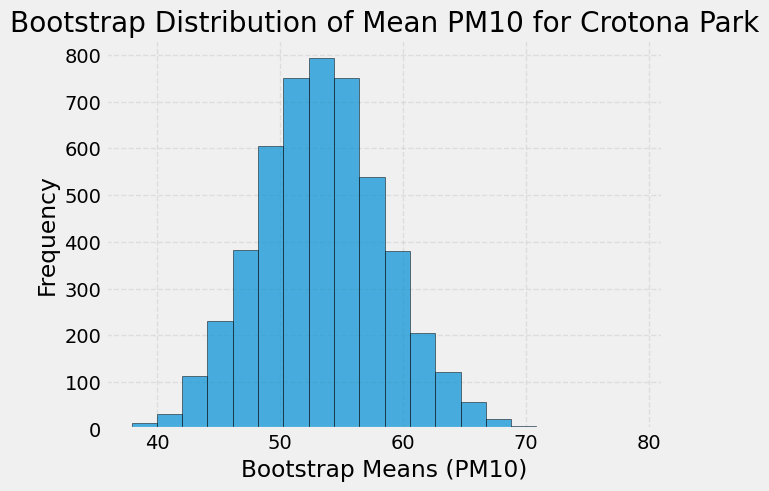

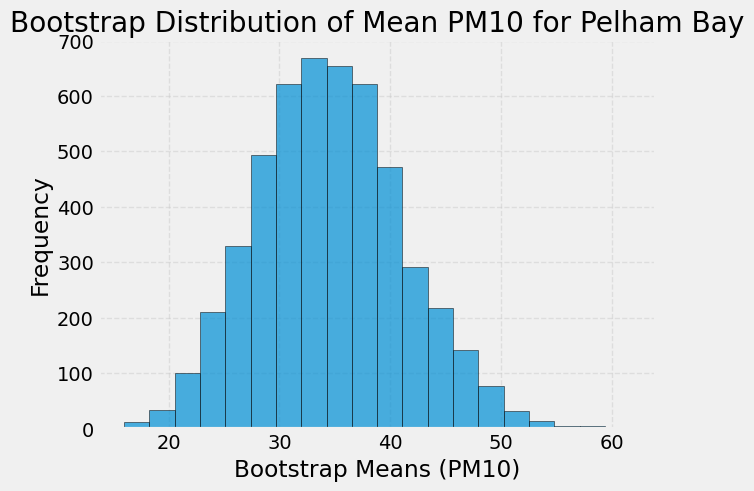

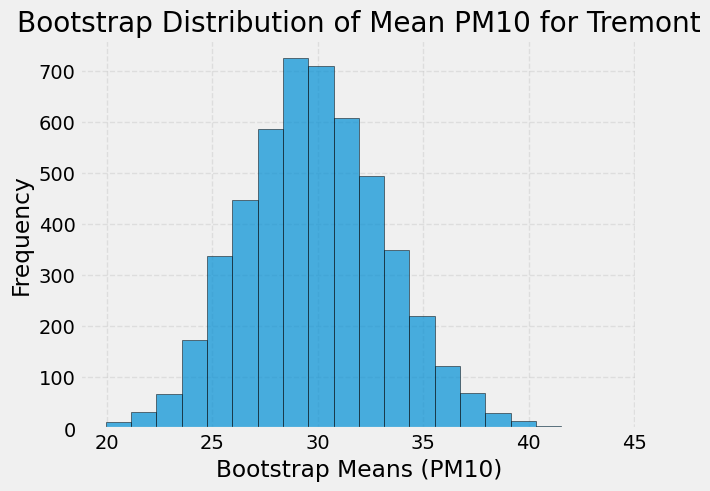

In [ ]:
import matplotlib.pyplot as plt

# Step 5: Convert results to datascience Tables for visualization
bootstrap_tables = {}
for neighborhood in bootstrap_results:
    bootstrap_tables[neighborhood] = Table().with_column('Bootstrap Means', bootstrap_results[neighborhood])

# Step 6: Plot improved histograms with matplotlib (title next to graph)
for neighborhood in bootstrap_tables:
    # Extract bootstrap means
    bootstrap_means = bootstrap_tables[neighborhood].column('Bootstrap Means')

    # Plot histogram
    plt.hist(bootstrap_means, bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Bootstrap Distribution of Mean PM10 for {neighborhood}')
    plt.xlabel('Bootstrap Means (PM10)')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


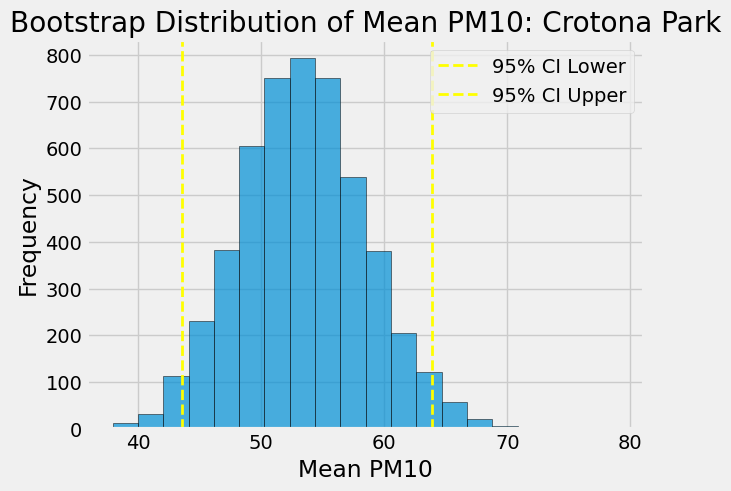

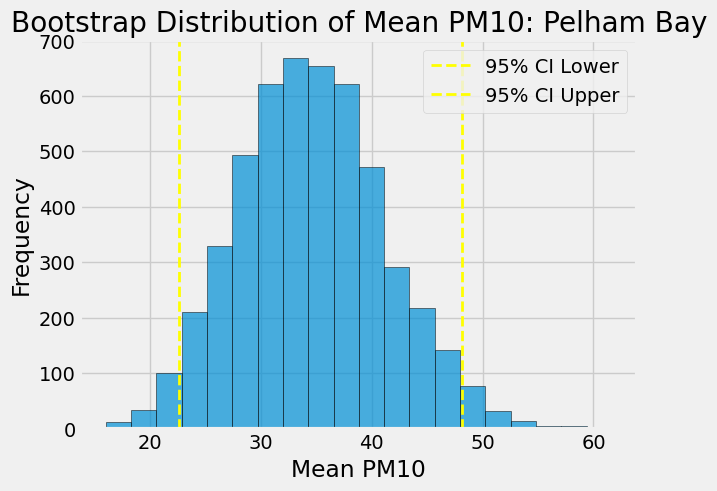

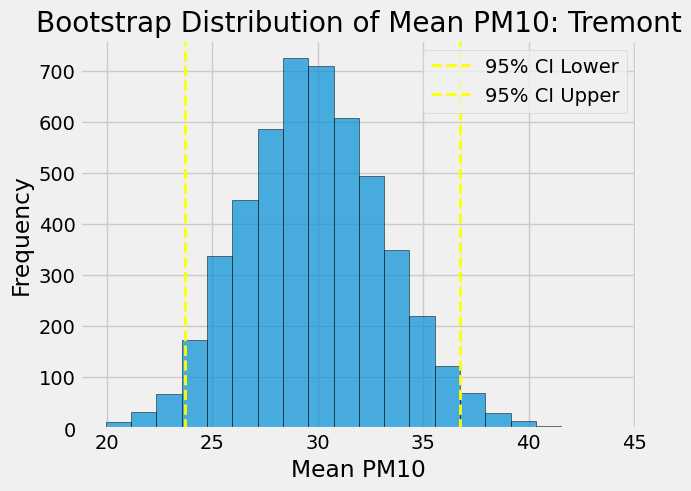

In [ ]:
import matplotlib.pyplot as plt

# Step 6: Plot histograms with 95% confidence interval lines
for neighborhood in bootstrap_tables:
    # Get the bootstrap means data
    bootstrap_means = bootstrap_tables[neighborhood].column('Bootstrap Means')

    # Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)

    # Plot histogram using matplotlib
    plt.hist(bootstrap_means, bins=20, edgecolor='k', alpha=0.7)
    plt.axvline(lower_bound, color='yellow', linestyle='dashed', linewidth=2, label='95% CI Lower')
    plt.axvline(upper_bound, color='yellow', linestyle='dashed', linewidth=2, label='95% CI Upper')

    plt.title(f'Bootstrap Distribution of Mean PM10: {neighborhood}')
    plt.xlabel('Mean PM10')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.